In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, LogisticRegression, Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import tensorflow as tf
from sklearn import preprocessing
from sklearn import utils

In [ ]:
data = fetch_california_housing(as_frame=True)
data.frame[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [ ]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
y_df = data.frame['MedHouseVal']
X_df = data.frame.drop('MedHouseVal', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

In [ ]:
X_scaled_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
5,0.087447,1.856182,-0.269730,0.014669,-0.894071,-0.089618,1.038503,-1.337818
6,-0.111366,1.856182,-0.200918,-0.306633,-0.292712,-0.090725,1.033821,-1.337818
7,-0.395137,1.856182,-0.255232,-0.073542,-0.237079,-0.123476,1.033821,-1.337818
8,-0.942359,1.061601,-0.458703,0.044254,-0.193810,-0.100499,1.033821,-1.342809
9,-0.094470,1.856182,-0.185283,-0.224687,0.110844,-0.086501,1.033821,-1.337818


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_df, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(error)
print(np.sqrt(error))

0.5558915986952441
0.7455813830127762


In [ ]:
n_epochs = 1000
batch_size = 32
eta = 0.01

theta = np.random.randn(X_train.shape[1] + 1)

for i in range(n_epochs):
    indices = np.random.choice(len(X_train), batch_size, replace=False)
    X = X_train.iloc[indices]
    y = y_train.iloc[indices]
    X_b = np.c_[np.ones((batch_size, 1)), X]  # Add bias term
    gradients = (2 / batch_size) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

print(theta)
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_mgd = X_test_b.dot(theta)

error2 = mean_squared_error(y_test, y_pred_mgd)
print(error2)
print(np.sqrt(error2))

[ 2.2077176   0.80232801  0.35215378  0.14152619 -0.0840003   0.40275756
  6.59387268 -0.49026176 -0.70232347]
2.3211314603631927
1.5235259959591083


In [ ]:
etab = 0.1
n_iter = 1000
thetab = np.random.randn(X_train.shape[1]+1)

X_b = np.c_[np.ones((len(X_train), 1)), X_train]

for i in range(n_iter):
  grad = (2/len(X_b))*X_b.T.dot(X_b.dot(thetab)-y_train)
  thetab = thetab - etab*grad

print(thetab)
y_pred_bgd = X_test_b.dot(thetab)

error3 = mean_squared_error(y_test, y_pred_bgd)
print(error3)
print(np.sqrt(error3))

[ 2.06786237  0.85242155  0.12238921 -0.30519291  0.37119927 -0.00229627
 -0.03662511 -0.89655048 -0.8688471 ]
0.5558965694651155
0.745584716491101


In [ ]:
eta0 = 0.1
num_iterations = 50
m = len(X_train)
power_t = 0.25

# Initialize theta with small random values
thetas = np.random.randn(X_train.shape[1] + 1)

# Stochastic gradient descent
for iteration in range(num_iterations):
    for i in range(m):
      random_index = np.random.randint(m)
      X = X_train[random_index:random_index+1]
      y = y_train[random_index:random_index+1]
      X_b = np.c_[np.ones((len(X), 1)), X]

      gradient = 2 * X_b.T.dot(X_b.dot(thetas) - y)
      etas = eta0 / (iteration+1)**power_t
      thetas -= etas * gradient

print(thetas)

X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_sgd = X_test_b.dot(thetas)
error4 = mean_squared_error(y_test, y_pred_sgd)
print(error4)
print(np.sqrt(error4))

<ipython-input-14-87900c1d0eb2>:17: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * X_b.T.dot(X_b.dot(thetas) - y)
<ipython-input-14-87900c1d0eb2>:19: RuntimeWarning: invalid value encountered in subtract
  thetas -= etas * gradient


[nan nan nan nan nan nan nan nan nan]


ValueError: ignored

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred1 = lin_reg.predict(X_test)

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred2 = lasso_reg.predict(X_test)

In [ ]:
mse_lin = mean_squared_error(y_test, y_pred1)
mse_lasso = mean_squared_error(y_test, y_pred2)
print(mse_lin, np.sqrt(mse_lin))
print(mse_lasso, np.sqrt(mse_lasso))

0.5558915986952441 0.7455813830127762
0.6795515190149223 0.824349148731848


[ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682] [ 0.70918587  0.10647473 -0.          0.         -0.         -0.
 -0.01147904 -0.        ]


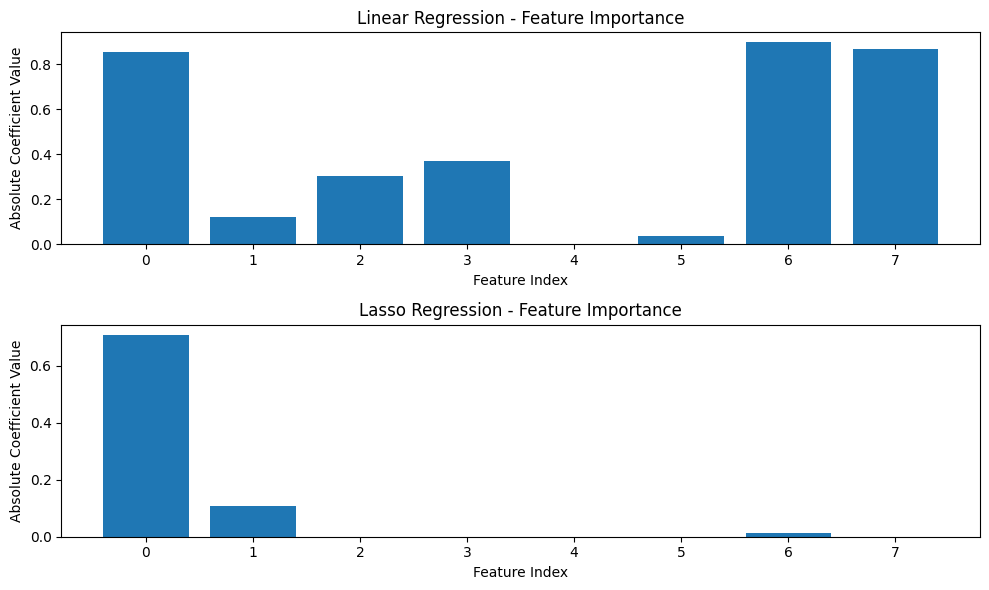

In [ ]:
# Feature Importance Analysis
lin_coefs = lin_reg.coef_
lasso_coefs = lasso_reg.coef_

print(lin_coefs, lasso_coefs)

# Visualization
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(range(len(lin_coefs)), np.abs(lin_coefs))
plt.title("Linear Regression - Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Absolute Coefficient Value")

plt.subplot(2, 1, 2)
plt.bar(range(len(lasso_coefs)), np.abs(lasso_coefs))
plt.title("Lasso Regression - Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Absolute Coefficient Value")

plt.tight_layout()
plt.show()

In [ ]:
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train, y_train)
y_pred3 = en.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred3)
print(mse_en, np.sqrt(mse_en))

0.635761280940628 0.7973463995909357


Sentiment analysis with elastic net


Data Preparation:

Obtain a dataset of movie reviews labeled with sentiment scores (positive or negative).
Preprocess the text data by tokenizing, removing stop words, and performing any necessary text cleaning.

In [ ]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

positive_reviews = movie_reviews.fileids('pos')
negative_reviews = movie_reviews.fileids('neg')

positive_review = movie_reviews.raw(positive_reviews[0])
print(positive_review)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [ ]:
reviews = []
labels = []
for fileid in positive_reviews:
    review = movie_reviews.raw(fileid)
    reviews.append(review)
    labels.append('positive')

for fileid in negative_reviews:
  review = movie_reviews.raw(fileid)
  reviews.append(review)
  labels.append('negative')

data = {'Reviews':reviews, 'Labels':labels}
df = pd.DataFrame(data)
df.head(10)

,Reviews,Labels
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive
5,"on june 30 , 1960 , a self-taught , idealistic...",positive
6,"apparently , director tony kaye had a major ba...",positive
7,one of my colleagues was surprised when i told...,positive
8,"after bloody clashes and independence won , lu...",positive
9,the american action film has been slowly drown...,positive


In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess(data):
  data = data.translate(str.maketrans("", "", string.punctuation)).lower()
  words = word_tokenize(data)
  cleaned_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
  return " ".join(cleaned_words)

In [ ]:
for i in range(df.shape[0]):
  df['Reviews'][i] = preprocess(df['Reviews'][i])

Feature Extraction:

Convert the preprocessed text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings like Word2Vec.

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Reviews'])

Sentiment Score Preparation:

Convert the sentiment labels (positive, negative) into numerical sentiment scores (e.g., 1 for positive and -1 for negative).

In [ ]:
vals_replace = {'positive':1, 'negative':-1}

In [ ]:
df['Labels'] = df['Labels'].map(vals_replace)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=50)

Elastic Net Regression:

Implement Elastic Net regression using Scikit-learn's ElasticNet class. Train the model using the extracted text features and sentiment scores.

In [ ]:
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred4 = en.predict(X_test)
error5 = mean_squared_error(y_test, y_pred4)
print(error5, np.sqrt(error5))

1.0002249999999995 1.0001124936725865


Hyperparameter Tuning:

Experiment with different combinations of the alpha and l1_ratio hyperparameters in Elastic Net to find the optimal settings. You can use techniques like GridSearchCV or RandomizedSearchCV.

In [ ]:
param_grid = {'alpha':[0.1, 0.01, 0.001], 'l1_ratio':[0.3, 0.5]}
en = ElasticNet()
rand_search = RandomizedSearchCV(en, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rand_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [0.1, 0.01, 0.001],
                                        'l1_ratio': [0.3, 0.5]},
                   return_train_score=True, scoring='neg_mean_squared_error')

Model Evaluation:

Evaluate the Elastic Net regression model's performance using appropriate regression evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

In [ ]:
best_model = rand_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred5 = best_model.predict(X_test)
error6 = mean_squared_error(y_test, y_pred5)
print(error6, np.sqrt(error6))

0.5832401350115604 0.7637016007653515


In [ ]:
rand_search.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.3)

Predicting Sentiments:

Use the trained Elastic Net model to predict sentiment scores for new movie reviews.

Visualization and Analysis:

Visualize the predicted sentiment scores against the actual sentiment scores to assess the model's performance. Plot the coefficients of the Elastic Net model to understand feature importance and analyze which words contribute to positive or negative sentiment.

Data Loading and Exploration:

Load the customer churn dataset.
Explore the dataset to understand its features and structure

In [ ]:
df = pd.read_csv("https://github.com/Pradnya1208/Telecom-Customer-Churn-prediction/raw/main/Scripts/data.csv", on_bad_lines='skip')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Preprocessing:

Handle missing values if any.
Encode categorical features (e.g., one-hot encoding).
Split the dataset into training and test sets.

In [ ]:
customerID = df['customerID']
df = df.drop('customerID', axis=1)

In [ ]:
Churn = df['Churn']
df = df.drop('Churn', axis=1)

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
cat_cols = []
for i in df.columns:
  if i!="SeniorCitizen" and i!="tenure" and i!="MonthlyCharges" and i!="TotalCharges":
    print(df[i].value_counts())
    cat_cols.append(i)

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [ ]:
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-43-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
med = df["TotalCharges"].median()
df['TotalCharges'].fillna(med, inplace=True)

Feature Scaling:

Scale the features using standardization or normalization.

In [ ]:
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_cols),
    ('numerical', num_pipeline, num_cols)
])

In [ ]:
df_transform = preprocessor.fit_transform(df)

In [ ]:
Churn = Churn.replace({'No' : 0, 'Yes': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_transform, Churn, test_size=0.2, random_state=42)

Logistic Regression Model:

Implement a logistic regression model using Scikit-learn's LogisticRegression class. Train the logistic regression model on the training data.

In [ ]:
log_reg2 = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', random_state=42)
log_reg2.fit(X_train, y_train)
y_pred7 = log_reg2.predict(X_test)
error7 = mean_squared_error(y_test, y_pred7)
print(error7, np.sqrt(error7))

0.17885024840312277 0.42290690276126114


Regularization Techniques:

Implement Lasso (L1) regularization using Scikit-learn's LogisticRegression class with appropriate hyperparameters.
Implement Ridge (L2) regularization using Scikit-learn's LogisticRegression class with different hyperparameters.
Train and compare the performance of the regularized models.

In [ ]:
log_reg1 = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', random_state=42)
log_reg1.fit(X_train, y_train)
y_pred8 = log_reg1.predict(X_test)
error8 = mean_squared_error(y_test, y_pred8)
print(error8, np.sqrt(error8))

0.177430801987225 0.4212253577210482


Model Evaluation:

Evaluate the logistic regression models using accuracy, precision, recall, F1-score, and ROC-AUC metrics on the test set.
Compare the results for different regularization techniques.

In [ ]:
a1, p1, r1, f1, ras1 = accuracy_score(y_test, y_pred7), precision_score(y_test, y_pred7), recall_score(y_test, y_pred7), f1_score(y_test, y_pred7), roc_auc_score(y_test, y_pred7)
a2, p2, r2, f2, ras2 = accuracy_score(y_test, y_pred8), precision_score(y_test, y_pred8), recall_score(y_test, y_pred8), f1_score(y_test, y_pred8), roc_auc_score(y_test, y_pred8)
print(a1, p1, r1, f1, ras1)
print(a2, p2, r2, f2, ras2)

0.8211497515968772 0.6850152905198776 0.6005361930294906 0.64 0.7505576718043206
0.8225691980127751 0.6880733944954128 0.6032171581769437 0.6428571428571429 0.7523807798606725


Ensemble Model:

Implement an ensemble model by combining the predictions of the logistic regression models (e.g., majority vote).
Compare the performance of the ensemble model with individual models.

In [ ]:
ensemble_model = VotingClassifier(estimators=[('l1', log_reg1), ('l2', log_reg2)], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred9 = ensemble_model.predict(X_test)
error9 = mean_squared_error(y_test, y_pred9)
print(error9, np.sqrt(error9))

0.177430801987225 0.4212253577210482


In [ ]:
a3, p3, r3, f3, ras3 = accuracy_score(y_test, y_pred9), precision_score(y_test, y_pred9), recall_score(y_test, y_pred9), f1_score(y_test, y_pred9), roc_auc_score(y_test, y_pred9)
print(a3, p3, r3, f3, ras3)

0.8225691980127751 0.6892307692307692 0.6005361930294906 0.6418338108882521 0.7515229227695716


Feature Importance Analysis:

Analyze the feature importance using the coefficients of the logistic regression models.
Identify which features have the most impact on predicting churn.

In [ ]:
def logisticAnalysis(model):
  coefficients = model.coef_[0]

  sorted_indices = np.argsort(np.abs(coefficients))[::-1]
  sorted_features = [f'Feature {idx}' for idx in sorted_indices]
  sorted_coefficients = coefficients[sorted_indices]

  plt.figure(figsize=(10, 6))
  plt.barh(sorted_features, sorted_coefficients)
  plt.xlabel("Coefficient Value")
  plt.ylabel("Feature")
  plt.title("Feature Importance Analysis")
  plt.tight_layout()
  plt.show()

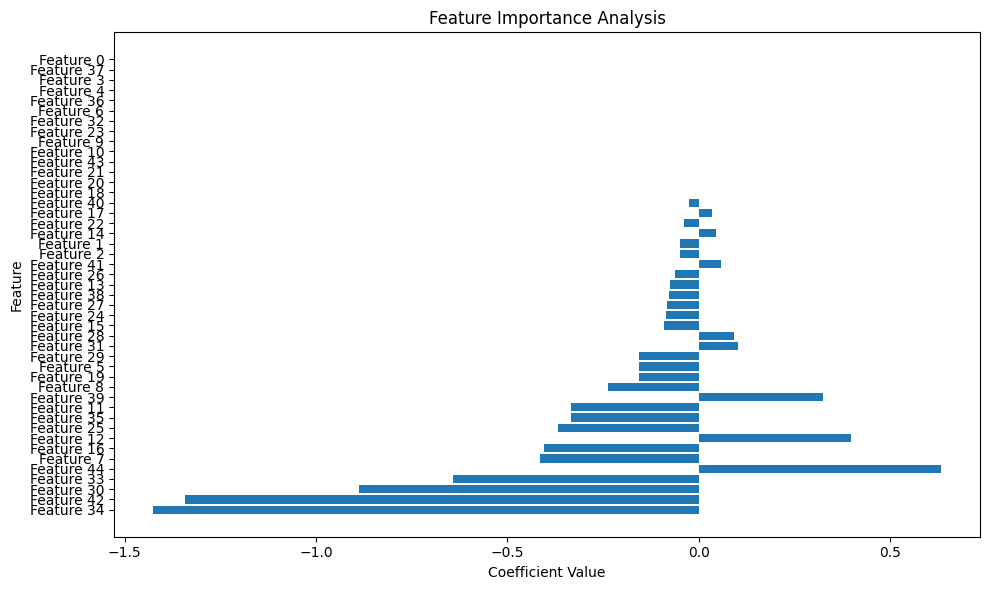

In [ ]:
logisticAnalysis(log_reg1)

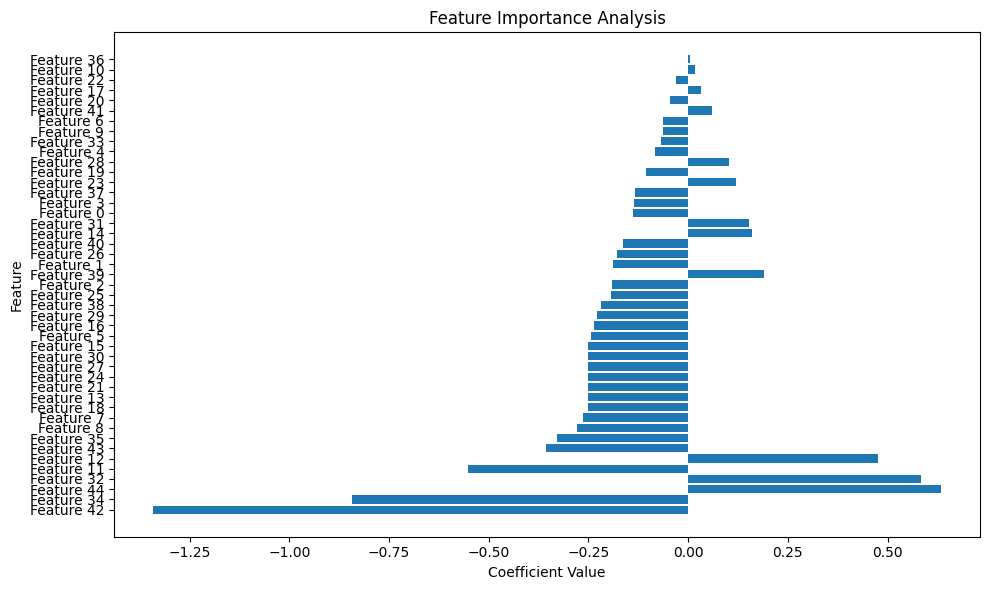

In [ ]:
logisticAnalysis(log_reg2)

Model Comparison and Conclusion:

Summarize the results and compare the performance of different models.
Provide insights into which models perform better for churn prediction.
Documentation and Reporting:

Document each step of your process, including data preprocessing, model training, evaluation, and comparisons.
Present your findings and insights in a clear and organized report.

Task: Building a Comprehensive Model Evaluation Framework

Imagine you are working on a project for a real estate company that aims to predict housing prices based on various features. Your task is to create a comprehensive model evaluation framework that covers different aspects of training models. You'll be using the California housing dataset for this task.


Part 1: Data Exploration and Preprocessing


Load the California housing dataset and perform basic exploratory data analysis.
Preprocess the data by handling missing values, scaling features, and splitting it into training and test sets.

In [ ]:
data = fetch_california_housing(as_frame=True)
data.frame[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [ ]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
y_df = data.frame['MedHouseVal']
X_df = data.frame.drop('MedHouseVal', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

In [ ]:
X_scaled_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
5,0.087447,1.856182,-0.269730,0.014669,-0.894071,-0.089618,1.038503,-1.337818
6,-0.111366,1.856182,-0.200918,-0.306633,-0.292712,-0.090725,1.033821,-1.337818
7,-0.395137,1.856182,-0.255232,-0.073542,-0.237079,-0.123476,1.033821,-1.337818
8,-0.942359,1.061601,-0.458703,0.044254,-0.193810,-0.100499,1.033821,-1.342809
9,-0.094470,1.856182,-0.185283,-0.224687,0.110844,-0.086501,1.033821,-1.337818


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_df, test_size=0.2, random_state=42)


Part 2: Linear Regression

Train a linear regression model on the training data.
Evaluate the model's performance using Mean Squared Error (MSE) on the test set.
Visualize the predicted vs. actual housing prices.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred10 = lin_reg.predict(X_test)
error10 = mean_squared_error(y_test, y_pred10)
print(error10, np.sqrt(error10))

0.5558915986952441 0.7455813830127762


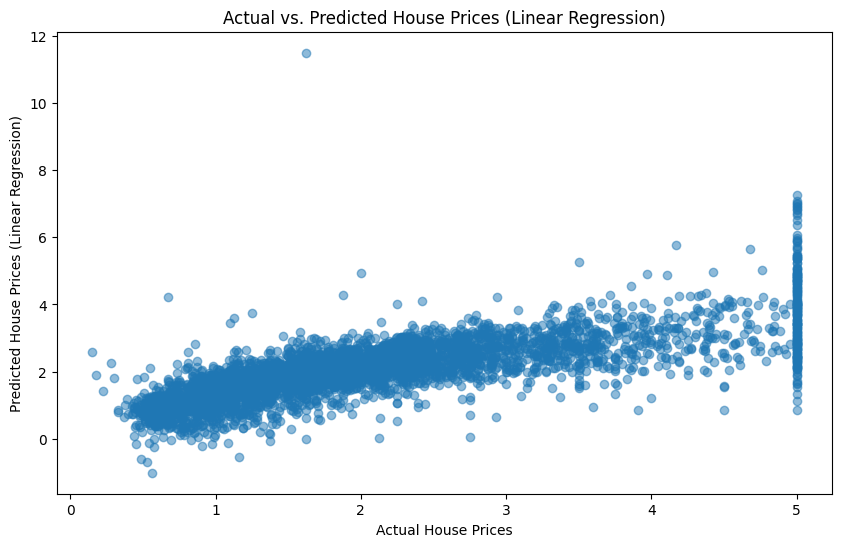

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred10, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (Linear Regression)")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.show()

Part 3: Regularized Linear Regression

Train Ridge regression, Lasso regression, and Elastic Net regression models.
Experiment with different hyperparameters for each regularization technique.
Evaluate the performance of each model using cross-validation and choose the best one.
Explain how regularization affects feature importance and model complexity.

In [ ]:
ridge_reg1 = Ridge(alpha=1.0, max_iter=None, tol=0.0001, solver='auto')
ridge_reg2 = Ridge(alpha=0.1, max_iter=None, tol=0.0001, solver='cholesky')
ridge_reg3 = Ridge(alpha=0.01, max_iter=None, tol=0.001, solver='auto')

ridge_reg1.fit(X_train, y_train)
y_pred11 = ridge_reg1.predict(X_test)
error11 = mean_squared_error(y_test, y_pred11)
print(error11, np.sqrt(error11))

ridge_reg2.fit(X_train, y_train)
y_pred12 = ridge_reg2.predict(X_test)
error12 = mean_squared_error(y_test, y_pred12)
print(error12, np.sqrt(error12))

ridge_reg3.fit(X_train, y_train)
y_pred13 = ridge_reg3.predict(X_test)
error13 = mean_squared_error(y_test, y_pred13)
print(error13, np.sqrt(error13))

0.555851200736751 0.7455542909384607
0.5558875470324994 0.7455786658914668
0.5558911934101397 0.7455811112214014


In [ ]:
lasso_reg1 = Lasso(alpha=1.0, max_iter=1000, tol=0.0001)
lasso_reg2 = Lasso(alpha=0.1, max_iter=100, tol=0.0001)
lasso_reg3 = Lasso(alpha=0.01, max_iter=1000, tol=0.001)

lasso_reg1.fit(X_train, y_train)
y_pred14 = lasso_reg1.predict(X_test)
error14 = mean_squared_error(y_test, y_pred14)
print(error14, np.sqrt(error14))

lasso_reg2.fit(X_train, y_train)
y_pred15 = lasso_reg2.predict(X_test)
error15 = mean_squared_error(y_test, y_pred15)
print(error15, np.sqrt(error15))

lasso_reg3.fit(X_train, y_train)
y_pred16 = lasso_reg3.predict(X_test)
error16 = mean_squared_error(y_test, y_pred16)
print(error16, np.sqrt(error16))

1.3106960720039365 1.1448563543099792
0.6795515190149223 0.824349148731848
0.5480355764811955 0.7402942499311983


In [ ]:
en_reg1 = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=0.0001)
en_reg2 = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=100, tol=0.0001)
en_reg3 = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000, tol=0.0001)

en_reg1.fit(X_train, y_train)
y_pred17 = en_reg1.predict(X_test)
error17 = mean_squared_error(y_test, y_pred17)
print(error17, np.sqrt(error17))

en_reg2.fit(X_train, y_train)
y_pred18 = en_reg2.predict(X_test)
error18 = mean_squared_error(y_test, y_pred18)
print(error18, np.sqrt(error18))

en_reg3.fit(X_train, y_train)
y_pred19 = en_reg3.predict(X_test)
error19 = mean_squared_error(y_test, y_pred19)
print(error19, np.sqrt(error19))

1.0429810992343884 1.0212644609670838
0.635761280940628 0.7973463995909357
0.5548303993135938 0.7448693840624635


In [ ]:
y_scores1 = cross_val_score(ridge_reg1, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores2 = cross_val_score(ridge_reg2, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores3 = cross_val_score(ridge_reg3, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores4 = cross_val_score(lasso_reg1, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores5 = cross_val_score(lasso_reg2, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores6 = cross_val_score(lasso_reg3, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores7 = cross_val_score(en_reg1, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores8 = cross_val_score(en_reg2, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
y_scores9 = cross_val_score(en_reg3, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

rmse_scores1 = np.sqrt(-y_scores1)
rmse_scores2 = np.sqrt(-y_scores2)
rmse_scores3 = np.sqrt(-y_scores3)
rmse_scores4 = np.sqrt(-y_scores4)
rmse_scores5 = np.sqrt(-y_scores5)
rmse_scores6 = np.sqrt(-y_scores6)
rmse_scores7 = np.sqrt(-y_scores7)
rmse_scores8 = np.sqrt(-y_scores8)
rmse_scores9 = np.sqrt(-y_scores9)
print(f'Mean RMSE1 = {np.mean(rmse_scores1):.2f} +/- {np.std(rmse_scores1):.2f}')
print(f'Mean RMSE2 = {np.mean(rmse_scores2):.2f} +/- {np.std(rmse_scores2):.2f}')
print(f'Mean RMSE3 = {np.mean(rmse_scores3):.2f} +/- {np.std(rmse_scores3):.2f}')
print(f'Mean RMSE4 = {np.mean(rmse_scores4):.2f} +/- {np.std(rmse_scores4):.2f}')
print(f'Mean RMSE5 = {np.mean(rmse_scores5):.2f} +/- {np.std(rmse_scores5):.2f}')
print(f'Mean RMSE6 = {np.mean(rmse_scores6):.2f} +/- {np.std(rmse_scores6):.2f}')
print(f'Mean RMSE7 = {np.mean(rmse_scores7):.2f} +/- {np.std(rmse_scores7):.2f}')
print(f'Mean RMSE8 = {np.mean(rmse_scores8):.2f} +/- {np.std(rmse_scores8):.2f}')
print(f'Mean RMSE9 = {np.mean(rmse_scores9):.2f} +/- {np.std(rmse_scores9):.2f}')

Mean RMSE1 = 0.72 +/- 0.01
Mean RMSE2 = 0.72 +/- 0.01
Mean RMSE3 = 0.72 +/- 0.01
Mean RMSE4 = 1.16 +/- 0.01
Mean RMSE5 = 0.82 +/- 0.00
Mean RMSE6 = 0.72 +/- 0.01
Mean RMSE7 = 1.03 +/- 0.01
Mean RMSE8 = 0.79 +/- 0.00
Mean RMSE9 = 0.72 +/- 0.01


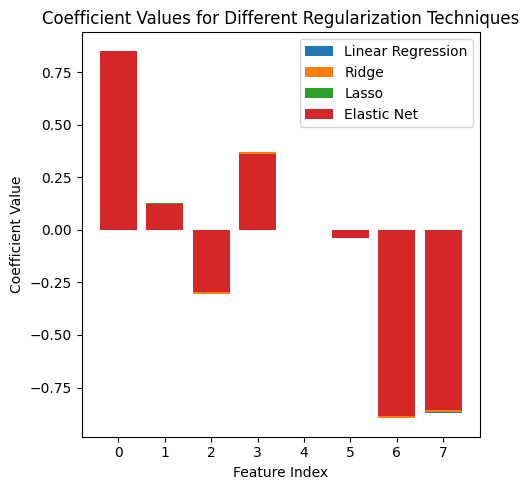

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(range(len(lin_reg.coef_)), lin_reg.coef_, label="Linear Regression")
plt.bar(range(len(ridge_reg1.coef_)), ridge_reg1.coef_, label="Ridge")
plt.bar(range(len(lasso_reg3.coef_)), lasso_reg3.coef_, label="Lasso")
plt.bar(range(len(en_reg3.coef_)), en_reg3.coef_, label="Elastic Net")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Different Regularization Techniques")
plt.legend()
plt.tight_layout()
plt.show()

Part 4: Decision Trees and Random Forests

Train a DecisionTreeRegressor and a RandomForestRegressor.
Tune hyperparameters for the DecisionTreeRegressor (max depth, min samples leaf, etc.).
Evaluate the models using RMSE and visualize feature importances.


In [ ]:
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)

y_pred20 = tree_reg.predict(X_test)
y_pred21 = forest_reg.predict(X_test)

error20 = mean_squared_error(y_test, y_pred20)
error21 = mean_squared_error(y_test, y_pred21)
print(error20, np.sqrt(error20))
print(error21, np.sqrt(error21))

0.4997600498684351 0.7069370904602722
0.25438791863703636 0.5043688319444772


In [ ]:
param_grid = {'max_depth':[1, 5, None], 'min_samples_leaf':[15, 10], 'min_samples_split':[5, 10]}
tree_reg1 = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg1, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'max_depth': None, 'min_samples_leaf': 15, 'min_samples_split': 10}
DecisionTreeRegressor(min_samples_leaf=15, min_samples_split=10)


In [ ]:
y_pred22 = best_model.predict(X_test)
print(y_pred22)
error22 = mean_squared_error(y_test, y_pred22)
print(error22, np.sqrt(error22))

[0.51814286 0.87745455 4.80343571 ... 4.71504957 0.67354545 1.65891667]
0.3576237310551403 0.5980164973101831


Part 5: Support Vector Machines (SVM)

Train a SVR model with different kernel types (linear, polynomial, RBF).
Tune hyperparameters for the SVR models.
Evaluate the models using RMSE and analyze their performance.



In [ ]:
svm_reg = SVR()
param_grid = {'kernel':['linear', 'poly', 'rbf'], 'C':[1, 0.1], 'tol':[0.0001, 0.00001]}
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_svm = grid_search.best_estimator_
print(best_params)
print(best_model_svm)

{'C': 1, 'kernel': 'rbf', 'tol': 1e-05}
SVR(C=1, tol=1e-05)


In [ ]:
y_pred23 = best_model_svm.predict(X_test)
error23 = mean_squared_error(y_test, y_pred23)
print(error23, np.sqrt(error23))

0.35518873259121153 0.5959771242180454


Part 6: Neural Networks (Deep Learning)

Implement a simple neural network using Keras.
Train the neural network on the data.
Evaluate the model's performance using RMSE.
Compare the neural network's performance with other models.


In [ ]:
neural_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
neural_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
neural_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred24 = neural_model.predict(X_test)
error24 = mean_squared_error(y_test, y_pred24)
print(error24, np.sqrt(error24))

Epoch 1/50
516/516 [==============================] - 5s 6ms/step - loss: 1.0761 - mean_absolute_error: 0.7212 - val_loss: 0.5646 - val_mean_absolute_error: 0.5438
Epoch 2/50
516/516 [==============================] - 2s 4ms/step - loss: 0.4677 - mean_absolute_error: 0.4905 - val_loss: 0.4390 - val_mean_absolute_error: 0.4781
Epoch 3/50
516/516 [==============================] - 2s 4ms/step - loss: 0.4123 - mean_absolute_error: 0.4605 - val_loss: 0.4145 - val_mean_absolute_error: 0.4586
Epoch 4/50
516/516 [==============================] - 3s 6ms/step - loss: 0.3931 - mean_absolute_error: 0.4482 - val_loss: 0.3977 - val_mean_absolute_error: 0.4510
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3811 - mean_absolute_error: 0.4394 - val_loss: 0.3903 - val_mean_absolute_error: 0.4417
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3764 - mean_absolute_error: 0.4349 - val_loss: 0.3882 - val_mean_absolute_error: 0.4369
Epoch 7/50
516/5

Part 7: Model Ensemble and Stacking

Create an ensemble of your best-performing models.
Implement a stacking model using your ensemble and a meta-learner (e.g., linear regression).
Evaluate the stacked model's performance and compare it with individual models.

Part 8: Model Selection and Final Evaluation

Summarize the performance of all models you've trained.
Based on the nature of the problem and the dataset, recommend the best-performing model for the real estate company's use.

Part 9: Documentation and Reporting

Document each step of your process, including data preprocessing, model training, evaluation, and reasoning for model selection.
Present your findings and results in a well-structured report.

In [ ]:
meta_dataset = np.column_stack((y_pred21, y_pred24))

In [ ]:
meta_dataset[:10]

array([[0.48828   , 0.4591862 ],
       [0.70091   , 1.24117589],
       [4.8475765 , 4.21551704],
       [2.58005   , 2.63448095],
       [2.28686   , 2.79214382],
       [1.70381   , 1.70237446],
       [2.33665   , 2.48855972],
       [1.66861   , 1.64820623],
       [2.60819   , 2.61440396],
       [4.9227991 , 4.44015598]])

In [ ]:
meta_learner = LogisticRegression()

# Train the meta-learner on the meta-dataset
meta_learner.fit(meta_dataset, y_test)  # Use y_test as the true labels

# Now, make predictions using the stacked model
stacked_pred = meta_learner.predict(meta_dataset)

stacked_accuracy = accuracy_score(y_test, stacked_pred)
print("Stacked Model Accuracy:", stacked_accuracy)

ValueError: ignored